In [77]:
def getDatatype(rawDatatype: str) -> str:
    if rawDatatype.startswith('string'):
        return rawDatatype.split('_')[0].capitalize() + ' of length ' + rawDatatype.split('_')[-1]
    return rawDatatype.capitalize()

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join
from collections import defaultdict

onlyfiles = [f for f in listdir('Logs') if isfile(join('Logs', f))]
avlTreeResults = {getDatatype(f[8:-4]) : pd.read_csv('Logs/' + f) for f in onlyfiles if f[0] == 'A'}
skipListResults = {getDatatype(f[9:-4]) : pd.read_csv('Logs/' + f) for f in onlyfiles if f[0] == 'S'}

In [100]:
diff = defaultdict(list)

for datatype in sorted(avlTreeResults.keys()):
    # fig, ax = plt.subplots(1, 3, figsize=(24, 6))

    for ds, dsResults in {'AVLTree' : avlTreeResults, 'SkipList' : skipListResults}.items():
        for i, operation in enumerate(('Insertion', 'Search', 'Erasure')):
            # ax[i].set_xlabel('Initial Size')
            # ax[i].set_ylabel('Time, ns')
            # ax[i].set_title(operation + ' ' + datatype)

            if (ds == 'SkipList'):
                diff[operation].append((skipListResults[datatype][operation + 'TimeNs'] / avlTreeResults[datatype][operation + 'TimeNs']).mean());
#             ax[i].loglog(dsResults[datatype]['InitSize'], dsResults[datatype][operation + 'TimeNs'], label=ds)
#             ax[i].legend()
    
    # fig.savefig('Images/BaseOperations' + datatype + '.png', bbox_inches='tight')
# plt.show()

In [101]:
for datatype in sorted(avlTreeResults.keys()):
    # fig, ax = plt.subplots(1, 3, figsize=(30, 6))

    for ds, dsResults in {'AVLTree' : avlTreeResults, 'SkipList' : skipListResults}.items():
        for i, operation in enumerate(('Initialization', 'Destruction')):
            # ax[i].set_xlabel('Initial Size')
            # ax[i].set_ylabel('Time, ns')
            # ax[i].set_title(operation + ' ' + datatype)

            if (ds == 'SkipList'):
                diff[operation].append((skipListResults[datatype][operation + 'TimeNs'] / avlTreeResults[datatype][operation + 'TimeNs']).mean());
            # ax[i].loglog(dsResults[datatype]['InitSize'], dsResults[datatype][operation + 'TimeNs'], label=ds)
            # ax[i].legend()

#         ax[2].set_xlabel('Size')
#         ax[2].set_ylabel('Used memory, MB')
#         ax[2].set_title('Used memory' + ' ' + datatype)

    if (ds == 'SkipList'):
        diff['MemoryUsage'].append((skipListResults[datatype]['MemoryUsed'] / avlTreeResults[datatype]['MemoryUsed']).mean());

#         ax[2].loglog(dsResults[datatype]['InitSize'], dsResults[datatype]['MemoryUsed'] / (1024 ** 2), label=ds)
#         if ds == 'SkipList':
#             ax[2].loglog(dsResults[datatype]['InitSize'], dsResults[datatype]['InitSize'] / (1024 ** 2), label='$n$')
#         ax[2].legend()
        
#     fig.savefig('Images/OtherInfo' + datatype + '.png', bbox_inches='tight')
# plt.show()

In [102]:
df = pd.DataFrame.from_dict(diff, orient='index',
                       columns=avlTreeResults.keys())

df.to_csv('difference.csv')
df

,Double,Int,String of length 128,String of length 16,String of length 256,String of length 32,String of length 64
Insertion,0.862216,0.890476,1.396425,1.528581,1.363964,1.428711,1.441034
Search,1.503434,1.534939,1.049371,1.080971,1.154150,1.081968,1.126256
Erasure,0.468728,0.501263,1.237859,1.386830,1.227533,1.293623,1.274797
Initialization,1.090633,1.122449,1.340637,1.476025,1.293755,1.371798,1.408728
Destruction,0.768524,0.775707,0.812717,0.813032,0.845428,0.858529,0.882243
MemoryUsage,1.507458,1.496437,1.183786,1.508876,1.105215,1.402237,1.285300


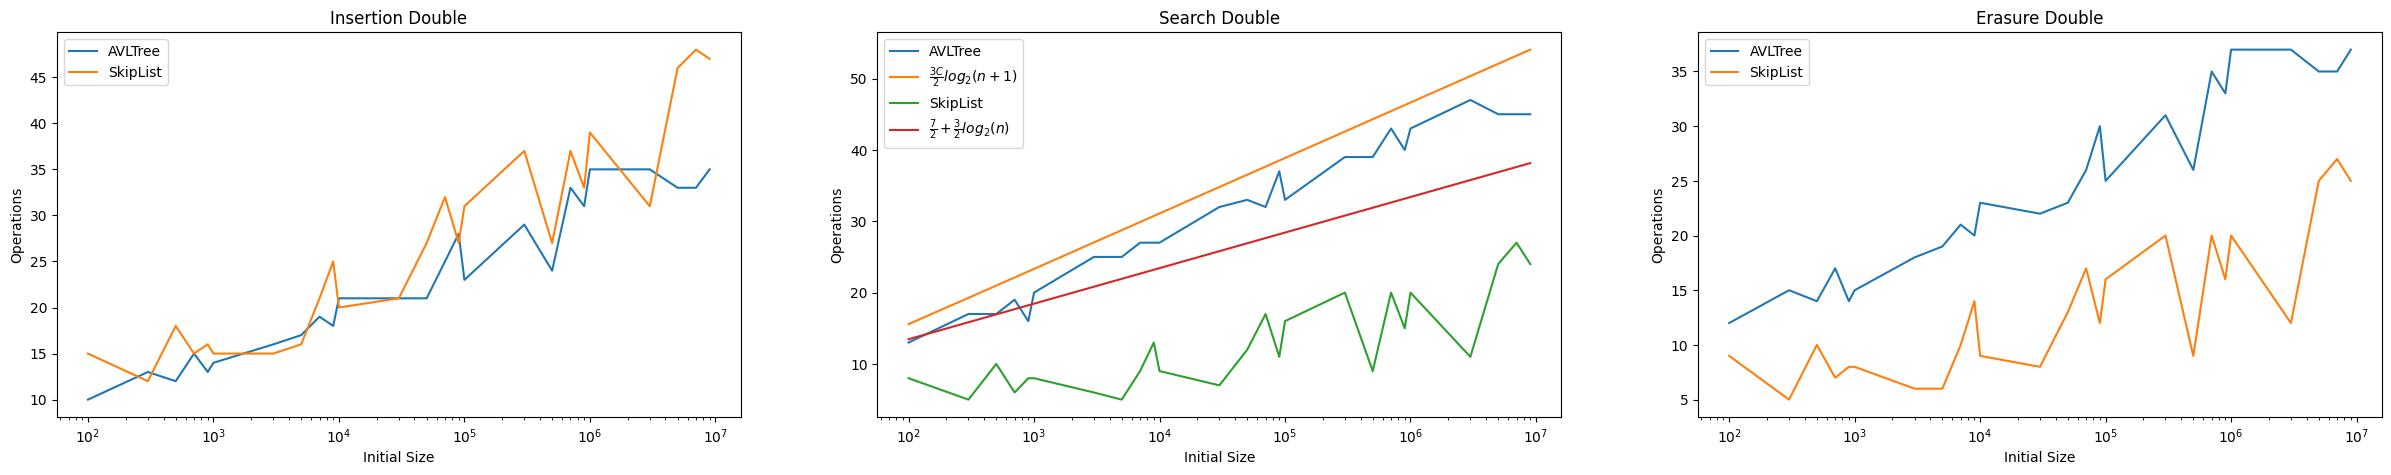

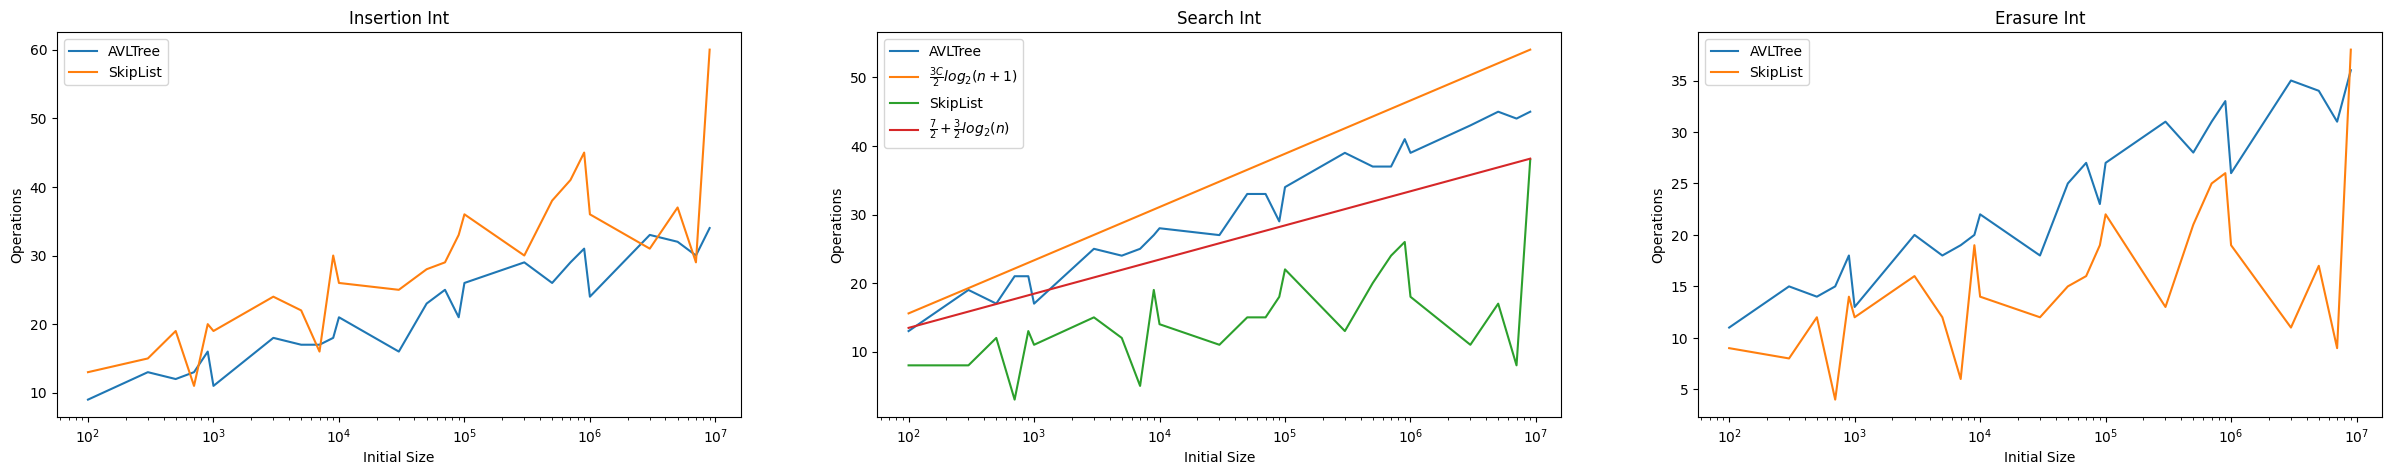

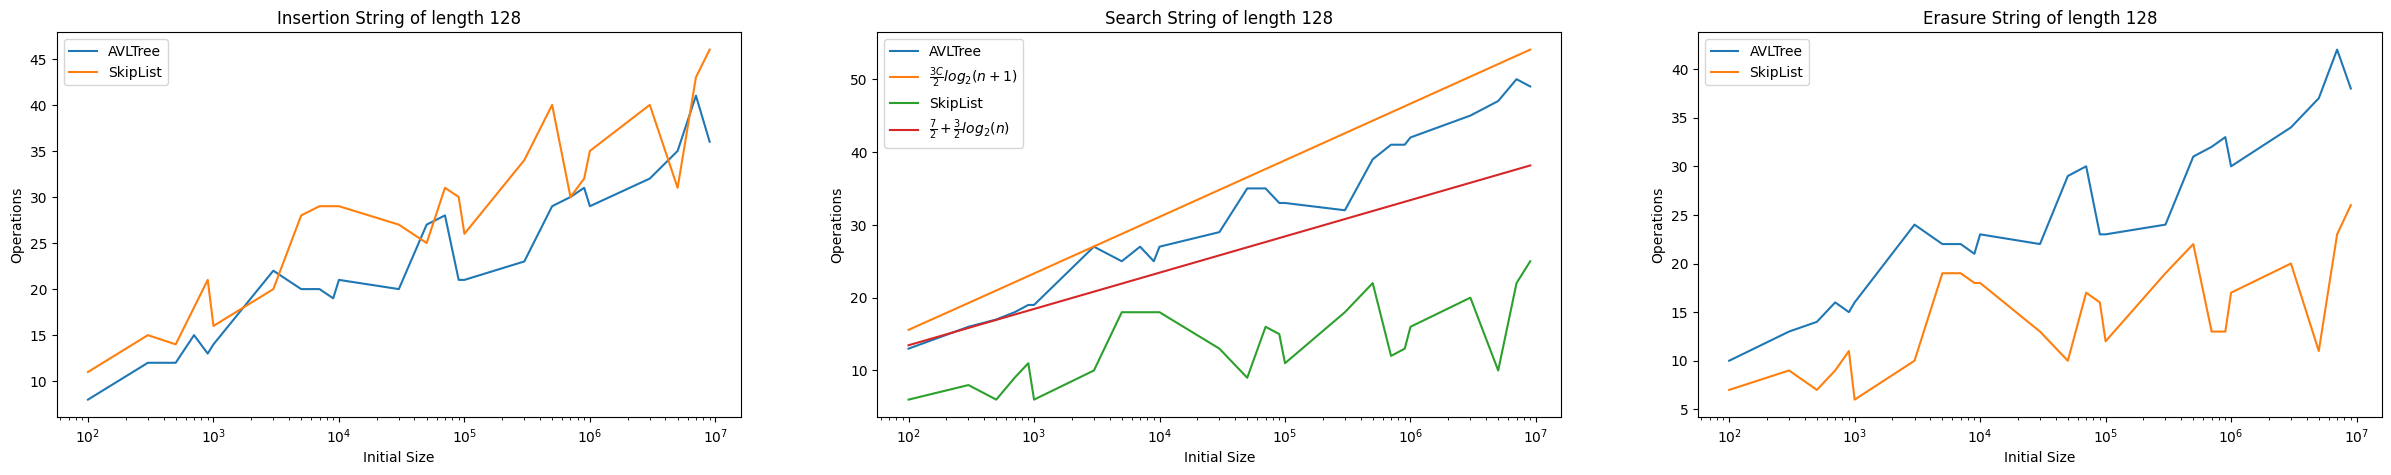

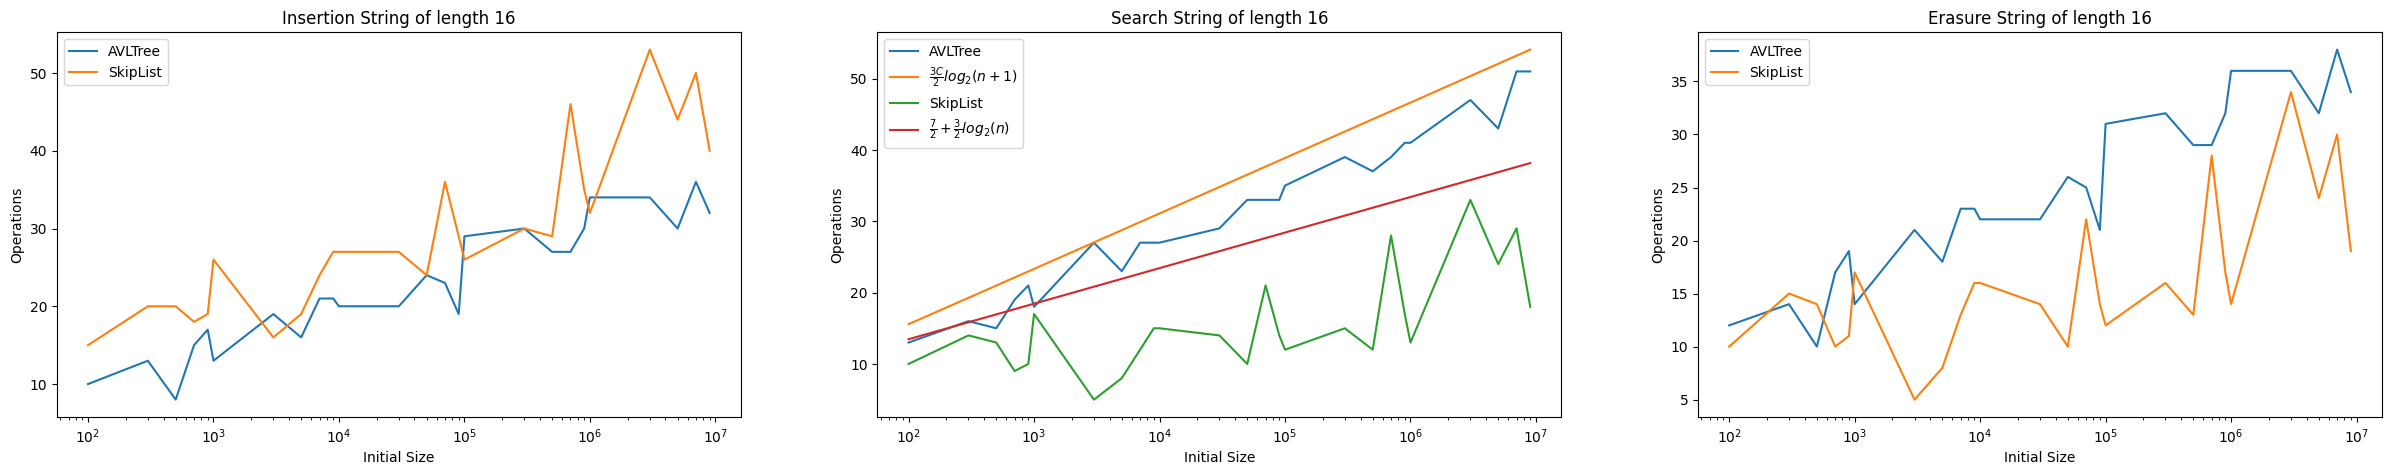

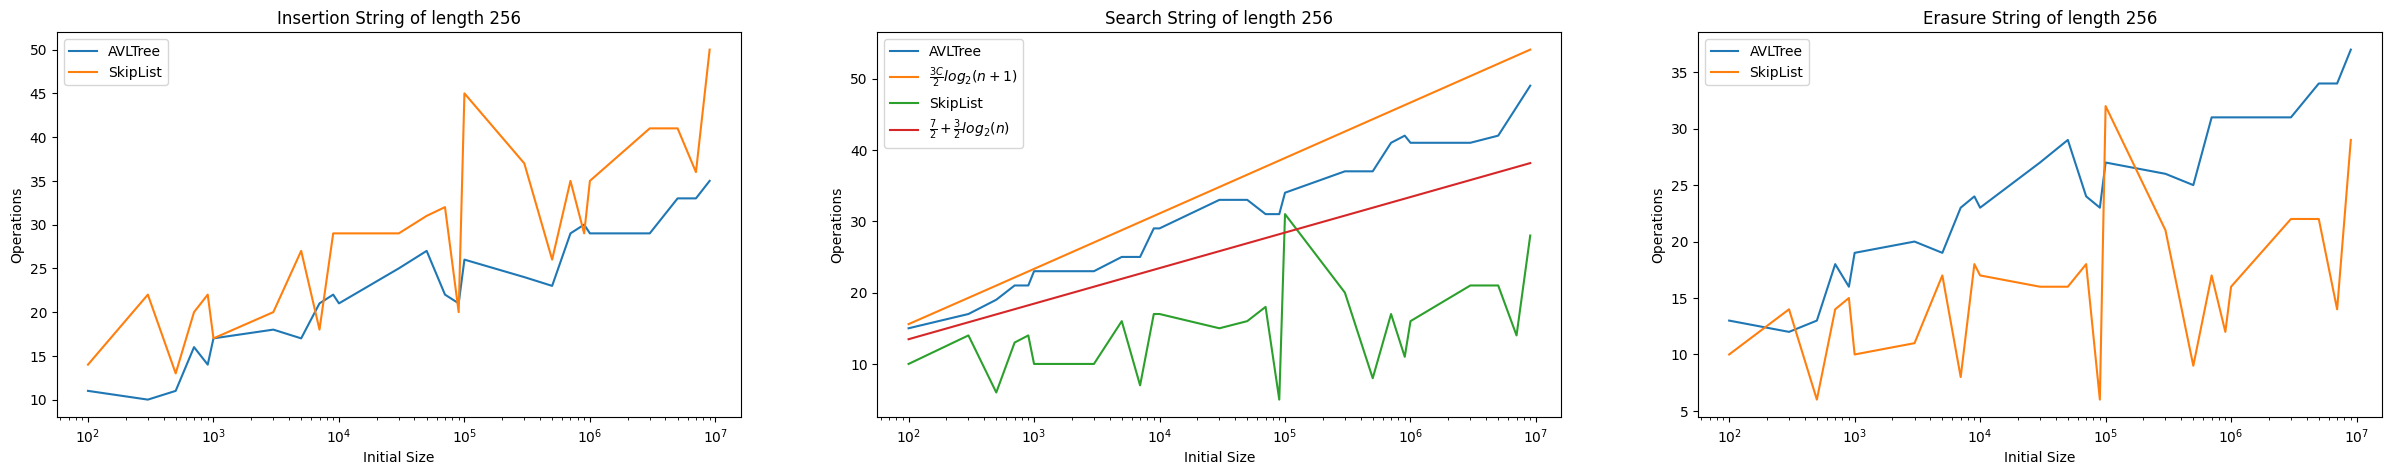

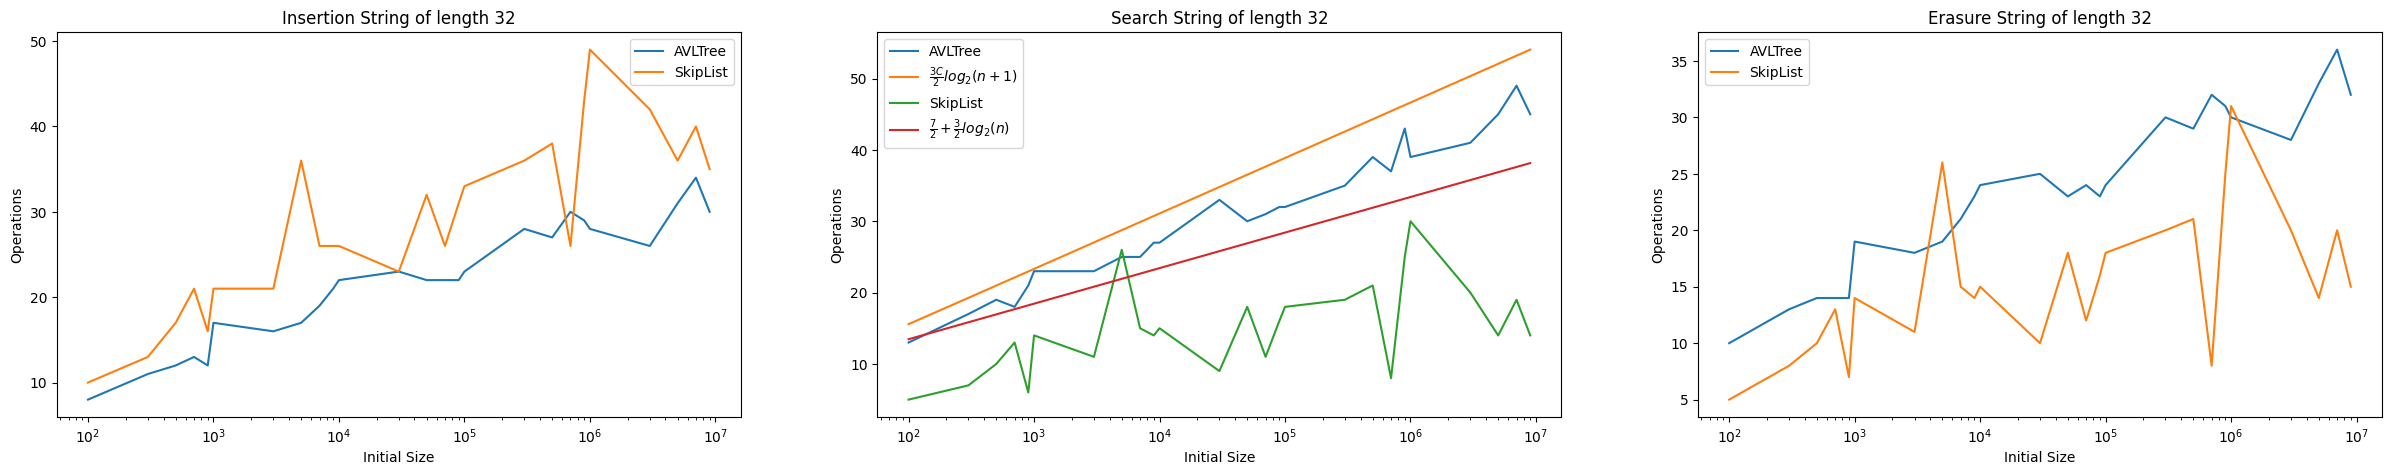

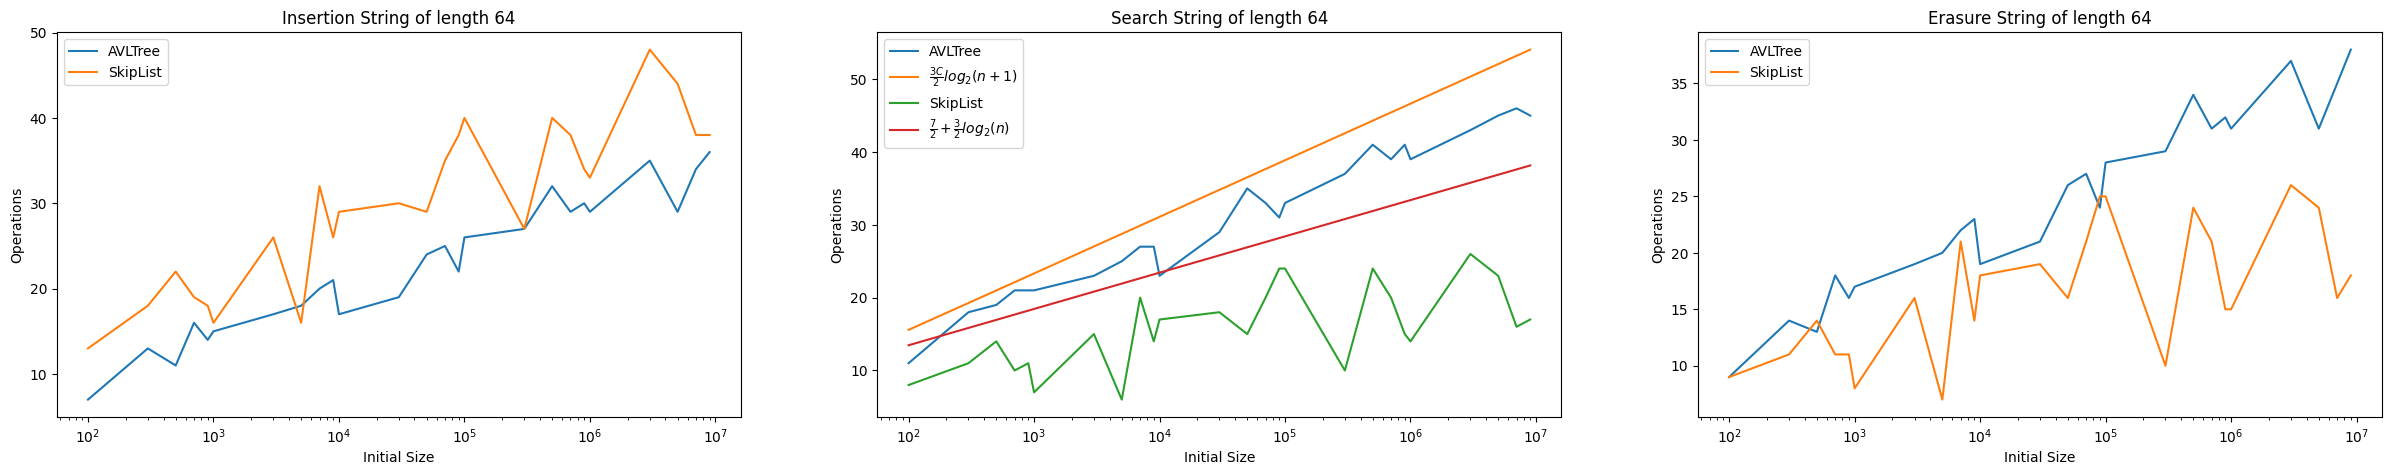

1.5600000000000005

In [91]:
c = 1

for datatype in sorted(avlTreeResults.keys()):
    while (1.5 * c * np.log2(avlTreeResults[datatype]['InitSize'] + 1) < avlTreeResults[datatype]['SearchOperations']).any():
        c += 0.01
            
            
for datatype in sorted(avlTreeResults.keys()):
    fig, ax = plt.subplots(1, 3, figsize=(30, 5))

    for ds, dsResults in {'AVLTree' : avlTreeResults, 'SkipList' : skipListResults}.items():
        for i, operation in enumerate(('Insertion', 'Search', 'Erasure')):
            ax[i].set_xlabel('Initial Size')
            ax[i].set_ylabel('Operations')
            ax[i].set_title(operation + ' ' + datatype.capitalize())
                   
            ax[i].semilogx(dsResults[datatype]['InitSize'], dsResults[datatype][operation + 'Operations'], label=ds)
            if operation == 'Search':
                if ds == 'AVLTree':
                    ax[i].semilogx(dsResults[datatype]['InitSize'], 1.5 * c * (np.log2(dsResults[datatype]['InitSize'] + 1)), label='$\\frac{3C}{2}log_2(n + 1)$')
                else:
                    ax[i].semilogx(dsResults[datatype]['InitSize'], 3.5 + 1.5 * np.log2(dsResults[datatype]['InitSize']), label='$\\frac{7}{2} + \\frac{3}{2}log_2(n)$')
            ax[i].legend()
    fig.savefig('Images/Comparisons' + datatype + '.png', bbox_inches='tight')

plt.show()

c